In [18]:
import pandas as pd
import numpy as np

In [19]:
players = pd.read_csv("nba_ds.csv", encoding= 'unicode_escape')

In [20]:
players

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [21]:
features = ['age', 'fg_pct','trb_per_g','ast_per_g','pts_per_g' , 'per', 'ws','award_share','win_loss_pct' ]

In [22]:
players = players.dropna(subset=features)

In [23]:
data = players[features].copy()

In [24]:
data

,age,fg_pct,trb_per_g,ast_per_g,pts_per_g,per,ws,award_share,win_loss_pct
0,34,0.579,8.7,3.0,23.9,23.4,10.7,0.045,0.695
1,27,0.494,7.4,4.5,15.1,18.6,7.2,0.000,0.561
2,22,0.465,4.9,3.2,18.7,17.3,1.9,0.000,0.341
3,22,0.357,1.1,1.6,4.1,10.1,0.5,0.000,0.768
4,33,0.472,1.7,8.0,12.6,14.3,5.2,0.000,0.768
...,...,...,...,...,...,...,...,...,...
17692,33,0.518,4.0,2.0,6.2,17.0,2.2,0.000,0.500
17693,23,0.460,3.7,9.7,28.4,25.4,10.0,0.000,0.524
17694,23,0.526,5.3,0.9,5.3,17.4,2.1,0.000,0.646
17695,29,0.567,4.6,0.8,5.2,17.2,1.1,0.000,0.329


In [25]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [26]:
data.describe()

,age,fg_pct,trb_per_g,ast_per_g,pts_per_g,per,ws,award_share,win_loss_pct
count,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000
mean,3.994935,4.981331,2.736668,2.187666,3.048678,5.147367,2.842825,1.054396,5.524865
std,1.421461,0.840750,1.226908,1.166078,1.477754,0.244732,1.165612,0.534434,1.667977
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.730769,4.645000,1.866310,1.372414,1.897574,5.034759,1.927039,1.000000,4.397959
50%,3.769231,5.014000,2.443850,1.806897,2.673854,5.151070,2.467811,1.000000,5.522959
75%,4.807692,5.392000,3.310160,2.613793,3.886792,5.271390,3.394850,1.000000,6.785714
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [27]:
data.head()

,age,fg_pct,trb_per_g,ast_per_g,pts_per_g,per,ws,award_share,win_loss_pct
0,6.538462,6.211,5.187166,2.862069,6.797844,5.572193,5.944206,1.405,7.761480
1,4.115385,5.446,4.561497,3.793103,4.663073,5.379679,4.592275,1.000,6.223214
2,2.384615,5.185,3.358289,2.986207,5.536388,5.327540,2.545064,1.000,3.697704
3,2.384615,4.213,1.529412,1.993103,1.994609,5.038770,2.004292,1.000,8.599490
4,6.192308,5.248,1.818182,5.965517,4.056604,5.207219,3.819742,1.000,8.599490


In [28]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [29]:
centroids = random_centroids(data, 5)

In [30]:
centroids

,0,1,2,3,4
age,7.576923,3.076923,3.769231,1.692308,5.500000
fg_pct,4.924000,5.797000,4.438000,5.770000,5.077000
trb_per_g,1.962567,2.925134,1.770053,3.358289,1.577540
ast_per_g,1.496552,2.613793,2.055172,3.606897,6.648276
pts_per_g,2.407008,1.000000,5.900270,1.994609,3.935310
per,5.331551,5.395722,5.022727,5.259358,5.110963
ws,3.974249,1.772532,3.935622,3.626609,1.849785
award_share,1.000000,1.000000,1.000000,1.000000,1.000000
win_loss_pct,6.085459,4.822704,6.360969,5.522959,7.440051


In [31]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [32]:
labels = get_labels(data, centroids)

In [33]:
labels

0        2
1        2
2        2
3        1
4        4
        ..
17692    0
17693    2
17694    3
17695    1
17696    3
Length: 17634, dtype: int64

In [34]:
labels.value_counts()

1    8416
2    3531
0    3080
3    2124
4     483
dtype: int64

In [35]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [37]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

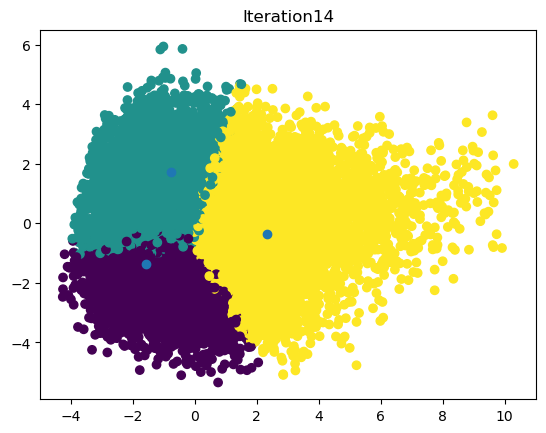

In [38]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [96]:
centroids

,0,1,2
age,3.324765,4.007553,3.771169
fg_pct,4.792438,5.271469,4.636982
trb_per_g,2.357315,3.550354,1.941096
ast_per_g,1.802857,2.768125,1.545862
pts_per_g,2.477337,4.396477,1.946030
per,5.084314,5.311104,5.035694
ws,2.175055,3.878343,2.154540
award_share,1.000000,1.063954,1.000000
win_loss_pct,3.191910,5.753257,6.245061


In [97]:
players[labels ==0][['player'] + features]

,player,age,fg_pct,trb_per_g,ast_per_g,pts_per_g,per,ws,award_share,win_loss_pct
12,Mel Bennett,27,0.500,1.0,0.0,1.7,-2.7,-0.1,0.0,0.183
16,Rolando Blackman,22,0.513,3.1,1.3,13.3,16.2,4.1,0.0,0.341
17,Ray Blume,23,0.459,0.8,1.4,4.6,9.7,-0.1,0.0,0.415
18,Alex Bradley,22,0.524,1.7,0.3,3.5,12.4,0.4,0.0,0.402
21,Brad Branson,23,0.404,3.3,0.6,5.3,8.4,-0.1,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...
17675,Brandon Williams,22,0.372,3.1,3.9,12.9,11.0,-0.5,0.0,0.329
17677,Kenrich Williams,27,0.461,4.5,2.2,7.4,13.3,1.8,0.0,0.293
17687,Robert Woodard II,22,0.125,0.9,0.3,0.6,2.1,-0.1,0.0,0.366
17691,Gabe York,28,0.286,1.0,2.0,4.0,12.7,0.0,0.0,0.305


In [98]:
from sklearn.cluster import KMeans

In [99]:
kmeans = KMeans(3)
kmeans.fit(data)

/Users/kanishkhari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [100]:
centroids = kmeans.cluster_centers_

In [101]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
age,4.134804,3.541777,4.218218
fg_pct,4.826412,4.926933,5.317684
trb_per_g,2.129928,2.644861,3.926788
ast_per_g,1.682729,2.038902,3.254020
pts_per_g,2.148424,2.833918,4.896928
per,5.057097,5.112535,5.346645
ws,2.295346,2.356250,4.340282
award_share,1.000000,1.000002,1.209524
win_loss_pct,6.366777,3.504927,6.126320
